In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from training_utils import CIFAR10_dataloaders, training_monitor

In [6]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Flatten image to vector
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

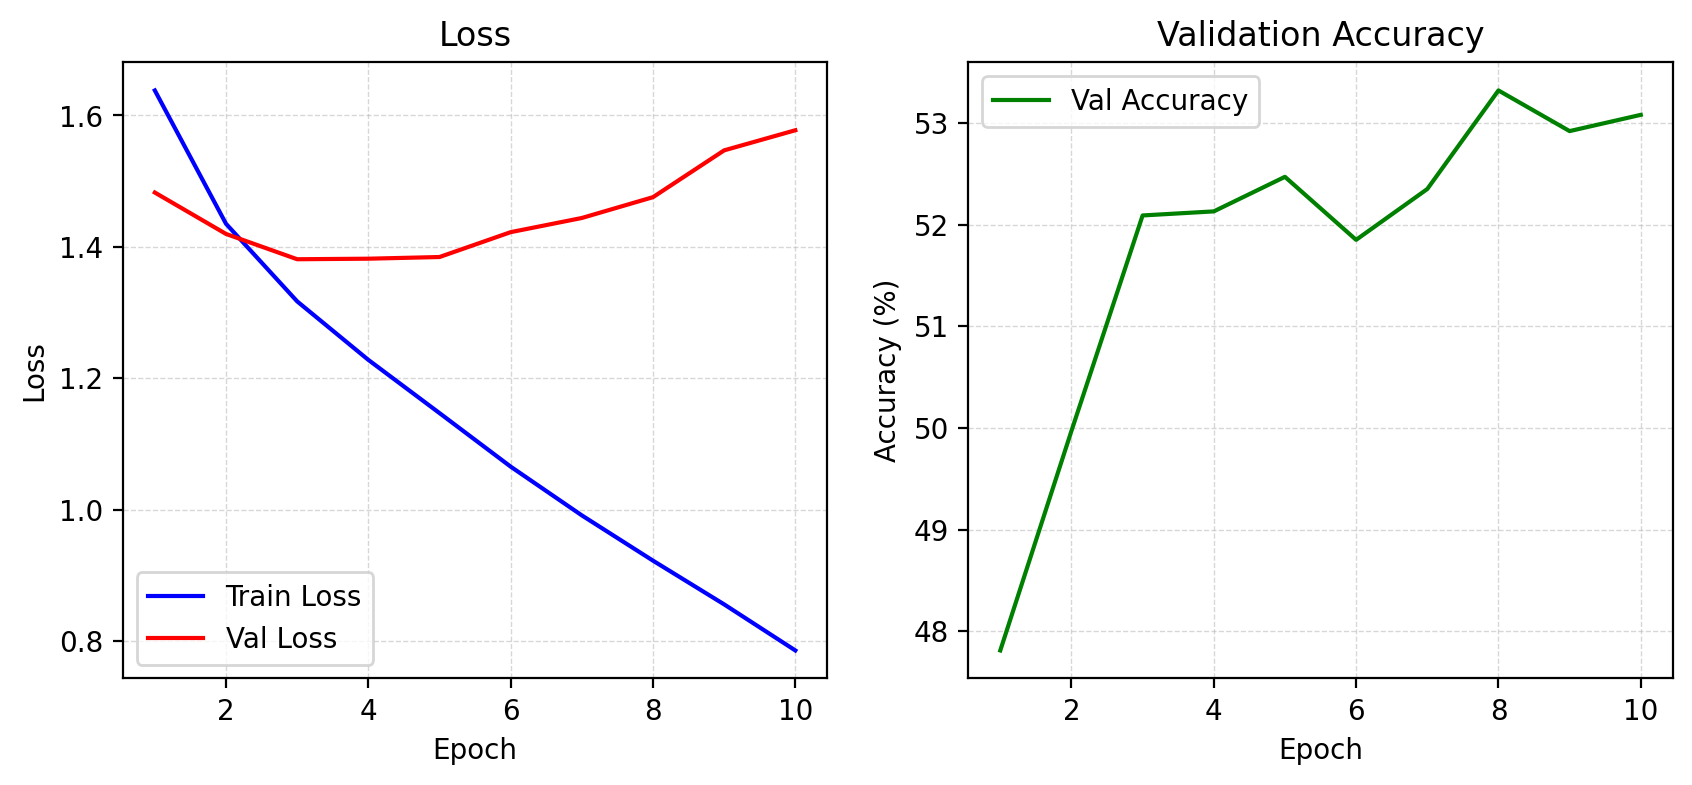

Epoch 10/10: 100%|##########| 10/10 [00:55<00:00,  5.59s/it, Train Loss: 0.7858, Val Loss: 1.5775, Val Acc: 53…

|       Epoch        |     Train loss     |  Validation loss   | Validation accuracy, %  |
__________________________________________________________________________________________
|         1          |       1.6380       |       1.4827       |         47.8100         |
|         2          |       1.4352       |       1.4197       |         49.9700         |
|         3          |       1.3170       |       1.3811       |         52.0900         |
|         4          |       1.2280       |       1.3820       |         52.1300         |
|         5          |       1.1470       |       1.3845       |         52.4700         |
|         6          |       1.0655       |       1.4224       |         51.8500         |
|         7          |       0.9913       |       1.4439       |         52.3500         |
|         8          |       0.9224       |       1.4756       |         53.3200         |
|         9          |       0.8559       |       1.5469       |         52.9200         |

In [8]:
trainloader, testloader, classes = CIFAR10_dataloaders(batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

trained_model = training_monitor(device, model, optimizer, criterion, num_epochs, trainloader, testloader)
